### CNN image classification
- prepare image datasets
    - torchvision datasets CIFIA 10
- learning algorithm
    - custom CNN

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optima

from torch.utils.data import Dataset, DataLoader

from torchvision import datasets
from torchvision.transforms import transforms
from torchmetrics.classification import Accuracy, F1Score, ConfusionMatrix
from torchinfo import summary

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = '../data/CIFIA'

In [4]:
cifia_dataset = datasets.CIFAR10(DATA_PATH, train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))


100.0%


Extracting ../data/CIFIA\cifar-10-python.tar.gz to ../data/CIFIA


In [5]:
type(cifia_dataset)

torchvision.datasets.cifar.CIFAR10

In [6]:
print(f"class: {cifia_dataset.classes}")
print(f"class to index: {cifia_dataset.class_to_idx}")
print(f"target: {cifia_dataset.targets}")
print(f"data shape: {cifia_dataset.data.shape}")

class: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class to index: {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
target: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 

In [7]:
LABEL_TRANSLATE = {value:key for key, value in cifia_dataset.class_to_idx.items()}
LABEL_TRANSLATE

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

- DataLoader
---
- 학습시 배치 크기만큼 데이터와 라벨 타겟을 로딩

In [8]:
BATCH_SIZE = 64
LR = 0.001
EPOCHS = 100
PATIENCE = 5

In [9]:
cifia_image_loader = DataLoader(cifia_dataset, batch_size=1)
cifia_loader = DataLoader(cifia_dataset, batch_size=BATCH_SIZE)

In [10]:
def show_data_image(data_loader, num):
    images, labels = data_loader.dataset[num]

    print(f"image shape: {images.T.shape}")
    print(f"image label: {labels}")
    print(f"translate image label: {LABEL_TRANSLATE[labels]}")

    images = images.T.numpy()
    # print(images.shape)

    plt.imshow(images)
    plt.title(f"[image - {LABEL_TRANSLATE[labels]}]")
    plt.axis('off')
    plt.show()

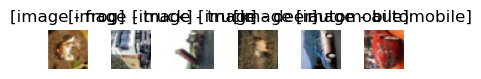

<Figure size 400x400 with 0 Axes>

In [11]:
for images, labels in cifia_loader:
    cnt = 0
    
    for i in range(BATCH_SIZE):
        if cnt > 5:
            break

        if i == 0:
            k, n = 1, 1
            
        else:
            k = i//8 + 1
            n = i%8 + 1
            
        
        image = images[i]
        image = image.transpose(0, 2).numpy()
        
        
        plt.subplot(8, 8, i+1)
        plt.imshow(image)
        plt.title(f"[image - {LABEL_TRANSLATE[labels[i].item()]}]")
        plt.axis('off')
        cnt += 1
        
    plt.figure(figsize=(4, 4))
    plt.show()
    break
    

In [12]:
cifia_dataset.data.shape

(50000, 32, 32, 3)

image shape: torch.Size([32, 32, 3])
image label: 3
translate image label: cat


C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_23424\63417976.py:4: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3701.)
  print(f"image shape: {images.T.shape}")


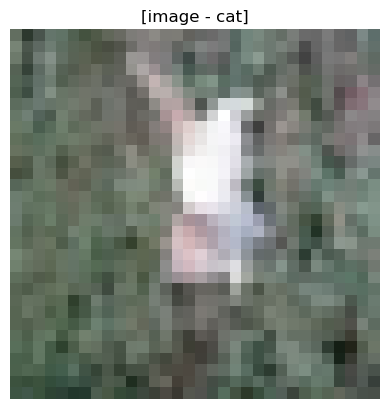

In [13]:
show_data_image(cifia_image_loader, 39)

- custom cnn model
---
- class name: ImageMCf
- pareants class: nn.Module
- learning mrehod: surpervised learning, multi classification
- model structure: CNN + DNN

In [14]:
class ImageNCF(nn.Module):
    def __init__(self):
        super().__init__()
        # feature sample
        self.input_layer = nn.Conv2d(in_channels=3, out_channels= 10, kernel_size=3)
        self.pooling_layer = nn.MaxPool2d(kernel_size=2, stride=2)
        # full connext
        # self.flaten = nn.Flatten(3, 1)
        self.hidden_layer_1 = nn.Linear(in_features=2250, out_features=1000)
        self.hidden_layer_2 = nn.Linear(1000, 500)
        self.hidden_layer_3 = nn.Linear(500, 100)
        self.output_layer = nn.Linear(100, 10)
    
    def forward(self, input_):
        output = self.input_layer(input_)
        print(f"[output 1] - {output.shape}")
        
        output = F.relu(output)
        print(f"[output 2] - {output.shape}")
        
        output = self.pooling_layer(output)
        print(f"[output 3] - {output.shape}")
        
        output = output.view(output.size(0), -1)
        print(f"[output 4] - {output.shape}")
        
        output = F.relu(self.hidden_layer_1(output))
        print(f"[output 5] - {output.shape}")
        
        output = F.relu(self.hidden_layer_2(output))
        print(f"[output 6] - {output.shape}")
        
        output = F.relu(self.hidden_layer_3(output))
        print(f"[output 7] - {output.shape}")
        
        output = self.output_layer(output)
        print(f"[output 8] - {output.shape}")
        return output

In [15]:
class ImageNCF2(nn.Module):
    def __init__(self):
        super().__init__()
        # feature sample
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels= 10, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            # nn.Flatten()
        )
        # full connext
        self.dnn_layer = nn.Sequential(
            nn.Linear(in_features=10*15*15, out_features=1000),
            nn.ReLU(),
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Linear(500, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
        
    def forward(self, input_):
        output = self.cnn_layer(input_)
        print(f"[output 1] - {output.shape}")
        
        output = output.view(output.size(0), -1)
        print(f"[output 2] - {output.shape}")
        
        y = self.dnn_layer(output)
        print(f"[output 3] - {output.shape}")
        return y

In [16]:
cnn_model = ImageNCF()

print(cnn_model)
summary(cnn_model, input_size=(100, 3, 32, 32))

ImageNCF(
  (input_layer): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
  (pooling_layer): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (hidden_layer_1): Linear(in_features=2250, out_features=1000, bias=True)
  (hidden_layer_2): Linear(in_features=1000, out_features=500, bias=True)
  (hidden_layer_3): Linear(in_features=500, out_features=100, bias=True)
  (output_layer): Linear(in_features=100, out_features=10, bias=True)
)
[output 1] - torch.Size([100, 10, 30, 30])
[output 2] - torch.Size([100, 10, 30, 30])
[output 3] - torch.Size([100, 10, 15, 15])
[output 4] - torch.Size([100, 2250])
[output 5] - torch.Size([100, 1000])
[output 6] - torch.Size([100, 500])
[output 7] - torch.Size([100, 100])
[output 8] - torch.Size([100, 10])


Layer (type:depth-idx)                   Output Shape              Param #
ImageNCF                                 [100, 10]                 --
├─Conv2d: 1-1                            [100, 10, 30, 30]         280
├─MaxPool2d: 1-2                         [100, 10, 15, 15]         --
├─Linear: 1-3                            [100, 1000]               2,251,000
├─Linear: 1-4                            [100, 500]                500,500
├─Linear: 1-5                            [100, 100]                50,100
├─Linear: 1-6                            [100, 10]                 1,010
Total params: 2,802,890
Trainable params: 2,802,890
Non-trainable params: 0
Total mult-adds (M): 305.46
Input size (MB): 1.23
Forward/backward pass size (MB): 8.49
Params size (MB): 11.21
Estimated Total Size (MB): 20.93

In [17]:
cnn_model_2 = ImageNCF2()

print(cnn_model_2)
summary(cnn_model_2, input_size=(1, 3, 32, 32))

ImageNCF2(
  (cnn_layer): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dnn_layer): Sequential(
    (0): Linear(in_features=2250, out_features=1000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1000, out_features=500, bias=True)
    (3): ReLU()
    (4): Linear(in_features=500, out_features=100, bias=True)
    (5): ReLU()
    (6): Linear(in_features=100, out_features=10, bias=True)
  )
)
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])


Layer (type:depth-idx)                   Output Shape              Param #
ImageNCF2                                [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 15, 15]           --
│    └─Conv2d: 2-1                       [1, 10, 30, 30]           280
│    └─ReLU: 2-2                         [1, 10, 30, 30]           --
│    └─MaxPool2d: 2-3                    [1, 10, 15, 15]           --
├─Sequential: 1-2                        [1, 10]                   --
│    └─Linear: 2-4                       [1, 1000]                 2,251,000
│    └─ReLU: 2-5                         [1, 1000]                 --
│    └─Linear: 2-6                       [1, 500]                  500,500
│    └─ReLU: 2-7                         [1, 500]                  --
│    └─Linear: 2-8                       [1, 100]                  50,100
│    └─ReLU: 2-9                         [1, 100]                  --
│    └─Linear: 2-10                      [1, 10]                   1

In [18]:
cnn_model.hidden_layer_1

Linear(in_features=2250, out_features=1000, bias=True)

In [21]:
for name, params in cnn_model.output_layer.named_parameters():
    print(name, params, sep='\n\n')

weight

Parameter containing:
tensor([[ 9.2033e-02, -6.4262e-03, -8.3509e-02,  7.1389e-02, -7.8418e-02,
          7.2837e-02, -6.3493e-02,  3.8943e-02,  8.1472e-03,  4.7176e-02,
          1.7001e-02,  5.4434e-02, -8.3814e-02,  4.9863e-02,  5.9099e-02,
          8.9878e-03, -3.3888e-02, -9.7147e-02, -1.7314e-02, -2.4559e-02,
          1.7714e-02,  4.4980e-02,  6.7291e-03, -8.9061e-02,  4.6874e-02,
         -5.8741e-02, -3.1317e-02, -9.0190e-02,  5.0583e-02, -7.5284e-02,
         -9.1087e-02, -4.3618e-02,  1.3355e-02,  5.7167e-02, -8.9151e-02,
          6.8644e-02, -7.2961e-02, -4.4549e-02,  9.5322e-02,  1.1354e-02,
         -8.9567e-02, -4.1936e-02, -5.1505e-02,  9.4973e-02,  3.6928e-02,
          5.4548e-02, -7.5358e-02, -2.1918e-02,  3.6956e-03,  7.7987e-02,
         -4.2808e-02, -8.7276e-02, -2.8362e-04, -6.5927e-02, -5.4997e-02,
         -8.3039e-02,  5.7991e-02,  8.5289e-02,  8.5730e-02,  8.8199e-02,
         -5.5279e-02,  4.6478e-02,  2.7356e-02, -3.7380e-03,  6.6884e-02,
        

In [22]:
# model test
real_label, pred_label = [], []
for images, labels  in cifia_image_loader:
    for label in labels:
        real_label.append(LABEL_TRANSLATE[label.item()])
    print(f"[label] - {real_label}")
    print(images.shape)

    p_i = cnn_model(images)
    
    for i in p_i:
        # print(image.argmax())
        pred_label.append(LABEL_TRANSLATE[i.argmax().item()])

    print(f"[predic label] - {pred_label}")
    break

[label] - ['frog']
torch.Size([1, 3, 32, 32])
[output 1] - torch.Size([1, 10, 30, 30])
[output 2] - torch.Size([1, 10, 30, 30])
[output 3] - torch.Size([1, 10, 15, 15])
[output 4] - torch.Size([1, 2250])
[output 5] - torch.Size([1, 1000])
[output 6] - torch.Size([1, 500])
[output 7] - torch.Size([1, 100])
[output 8] - torch.Size([1, 10])
[predic label] - ['automobile']


In [23]:
from torch.autograd import Variable
from torch.optim.lr_scheduler import ReduceLROnPlateau
from sklearn.metrics import accuracy_score, f1_score, log_loss
import sklearn

In [24]:
classes = cifia_dataset.classes

In [25]:
import sklearn.metrics


def testing(model, datasets):
    data_dl = DataLoader(datasets, batch_size=1)
    cnt = 0
    with torch.no_grad():
        preds = []
        real_labels = []
        real_labels_item = []
        test_list = []
        for test_images, test_labels in data_dl:
            if cnt > 100: break
            # dnn_preds.append(work.LABEL_TRANSLATE[dnn_model(test_images).argmax().item()])
            # dnn_real_labels.append(work.LABEL_TRANSLATE[test_labels.item()])
            
            preds.append(model(test_images).argmax().item())
            real_labels.append(test_labels.item())
            real_labels_item.append(LABEL_TRANSLATE[test_labels.item()])
            test_list.append([model(test_images).argmax().item(), float(test_labels.item())])
            cnt += 1
            
        # loss = log_loss(real_labels_item, test_list)
        acc_score = accuracy_score(real_labels, preds)
        # f1_score = sklearn.metrics.f1_score(real_labels, preds, zero_division=0)
        
    return acc_score

In [26]:
def tarining(dataset, model, epochs, lr, batch_size=64, patience=5):
    loss_list = []
    acc_list = []
    f1_list = []
    
    optimizer = optima.Adam(model.parameters(), lr=lr)
    data_dl = DataLoader(dataset, batch_size=batch_size, drop_last=False)
    scheduler = ReduceLROnPlateau(optimizer, patience=patience, mode='min')
    
    save_param = '../model/CIFIA/CNN_multi_clf_params.pth'
    save_model = '../model/CIFIA/CNN_multi_clf_model.pth'
    
    for epoch in range(1, epochs+1):
        total_t_loss, total_t_acc, total_t_f1 = 0, 0, 0
        
        for images, labels in data_dl:
            batch_cnt = len(dataset) / batch_size
            
            train = Variable(images.view(100, 1, 28, 28))
            labels = Variable(labels)
            
            pred = model(train)
            
            loss = nn.CrossEntropyLoss()(pred, labels)
            total_t_loss += loss
            
            a_score = Accuracy(task='multiclass', num_classes=10)(pred, labels)
            total_t_acc += a_score
            f_score = F1Score(task='multiclass', num_classes=10)(pred, labels)
            total_t_f1 += f_score
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        train_loss = (total_t_loss/batch_cnt).item()
        train_acc = (total_t_acc/batch_cnt).item()
        train_f1 = (total_t_f1/batch_cnt).item()
        
        loss_list.append(train_loss)
        acc_list.append(train_acc)
        f1_list.append(train_f1)

        if epoch%5 == 0:
            print(f"[{epoch:5}/{epochs:5}]  [Train]  loss: {train_loss:.6f}, score: {train_acc:.6f}")
            
        if len(acc_list) == 1:
            print("saved first")
            torch.save(model.state_dict(), save_param)
            torch.save(model, save_model)
        else:
            if acc_list[-1] >= max(acc_list):
                print("saved model")
                torch.save(model.state_dict(), save_param)
                torch.save(model, save_model)
                
        scheduler.step(train_loss)
        
        if scheduler.num_bad_epochs >= scheduler.patience:
            print('성능 및 손실의 개선이 없어서 학습을 중단합니다.\n')
            print(f"[{epoch:5}/{epochs:5}]  [Train]  loss: {train_loss:.6f}, score: {train_acc:.6f}")
            break
    return loss_list, acc_list, f1_list

In [27]:
acc = testing(cnn_model_2, cifia_dataset)

[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[output 1] - torch.Size([1, 10, 15, 15])
[output 2] - torch.Size([1, 2250])
[output 3] - torch.Size([1, 2250])
[

In [28]:
# print(f"test loss: {loss:.6f}")
print(f"test accuracy: {acc*100:.2f} %")

test accuracy: 4.95 %


In [35]:
# CIFIA10 CNN model class
# ---------------------------------------------------------
# class perpose: 0 ~ 9 fashion mnist multi classification
# class name: CIFIA10CNNModel
# parents class: nn.Module
# parameters: None
# attribute field: layer1, layer2 fc1, drop, fc2, fc3
# class function: create model structure, forward learning model
# class structure
# - layer1: conv2d(input:1, output:32, kernel:3*3, padding:1 to 0,), batch normalization, activate function: ReLU, maxpooling)
# - layer2: conv2d(input:32, output:64, kernel:3*3, padding:None), batch normalization, activate function: ReLU, maxpooling)
# - fc1: input node: 64*6*6, output node: 600, activate function: None
# - drop: 0.25
# - fc2: input node: 600, output node: 120, activate function: None
# - fc3: input node: 120, output node: 10, activate function: None

class CIFIA10CNNModel(nn.Module):
    """
    Fashion MNIST DNN multi classification model
    ---
    - parents class: nn.Module
    - parameters: None
    - attribute field: layer1, layer2 fc1, drop, fc2, fc3
    - class function: create model structure, forward learning model
    - class structure
        - cnn_layer
            - convloution layer: conv2d(input:3, output:10, kernel:3*3), activaite function: ReLU
            - pooling layer: Maxpooling(kernel: 2*2, stride: 2)
        - dnn_layer
            - hidden layer: input node: 10*15*15, output node: 1000, activate function: ReLU
            - hidden layer: input node: 1000, output node: 500, activate function: ReLU
            - hidden layer: input node: 500, output node: 100, activate function: ReLU
            - output: input node: 100, output node: 10, activate function: None
    ---
    function
    - __init__()
    - forward()
    """
    def __init__(self):
        super().__init__()
        
        # feature sample
        self.cnn_layer = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels= 10, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
            # nn.Flatten()
        )
        # full connext
        self.dnn_layer = nn.Sequential(
            nn.Linear(in_features=10*15*15, out_features=1000),
            nn.ReLU(),
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Linear(500, 100),
            nn.ReLU(),
            nn.Linear(100, 10)
        )
        
        
    def forward(self, input_):
        output = self.cnn_layer(input_)
        # print(f"[output 1] - {output.shape}")
        
        output = output.view(output.size(0), -1)
        # print(f"[output 2] - {output.shape}")
        
        y = self.dnn_layer(output)
        # print(f"[output 3] - {output.shape}")
        return y

In [36]:
cnn_model = torch.load('../model/CIFIA/multi_clf_model.pth', weights_only=False)

- 전의 학습은 모델의 cnn layer의 가중치는 학습하지 않음.
- Flatten 완전 결합층만 학습

In [ ]:
s